# Bio-Informatics 2020-2021 - Assignment 1
## Secondary structure prediction, influence of protein family and using evolutionary algorithm.
### By Yelda Büyük || 0527366 || Master Computer Science || Vrije Universiteit Brussel
This notebook contains the implementation of the GORIII algorithm and the discussion on the results. The code has been split up into modules to respect the seperation of concerns design principle.  *The following work is based on my own work of the previous year.*

#### Structure of the notebook
The notebook is structured as follows:
* Implementations
    * Data preprocessing 
    * GORIII 
    * Calculations of Q3 and MCC
    * Protein family prediction
* Running the algorithm
* Evaluation

## Implementations
### ---- Data preprocessing
The first part of the assignment is to preprocess the given datasets: dssp_info.txt and stride_info.txt. Both files contain the following information: protein code || protein chain code || protein sequence code || residue name || secondary structure. The code of the preprocessing module can be found in the file **Preprocessing.py**.

In this part, given a protein, we split the data (with the **splitData()** method) into a *training amino acid squence, a training secondary sequence, the actual protein amino acid sequence* and *the actual protein secondary sequence*. We achieve this by applying the leave-one-out method. The given protein is excluded from the computed training sets. This results into the fact that each protein will have its own individual training sets.

### ---- GOR III
The goal of the GOR III algorithm is to generate a secondary structure prediction of a given protein with a theoretical accuracy of on average 63%. The code for the GORIII algorithm can be found in the module **GORIII.py**. The algorithm class consists out of the following structure:
* Training phase
    * Self information
    * Pair information
* Prediction phase

#### Training phase
Two types of information is obtained during the training phase: the self and the pair information of an amino acid. We leave the protein to be predicted out of the training phase by making use of the preprocessed dataset. As mentioned earlier, therefore, the training sets per protein will slightly differ. The training of the self information and the pair information is initiated by the **train()** method.

##### Self information
The first step is to calculate the self information. To do so, we follow the following formula:
$$I(\Delta S_{j};R_{j}) = log(f_{S_{j}, R_{j}}/f_{n-S_{j}, R_{j}}) + log(f_{n-S}/f_{S})$$

The amino acids at position J with its current and the opposite states are counted first. This information will be stored into the self amino acid dictionary. Next, we count the used states in the actual protein secondary structure. These states will be compared with the overall states. The self information is calculated and trained with the **trainSelfInfo()** method within the GORIII class.

##### Pair information
The second step is to calculate the pair information (**countPairInfo()** method) of an amino acid.  We follow the following formula to achieve this:
$$I(\Delta S_{j};R_{j+m}|R_{j}) = log(f_{S_{j}, R_{j+m}, R_{j}}/f_{n-S_{j}, R_{j+m}, R_{j}}) + log(f_{n-S_{j}, R_{j}} / f_{S_{j}, R_{j}})$$

To clarify what is done in this part; for every amino acid we look at a window of 16 wide. At the start of the sequence, this 16 wide window will be smaller because we start at position 0 but we look from the relative -8 to +8 positions. This indicates that for position 0, the window will be from position 0 to 8. As soon as there is a possible 16 wide window, the algorithm will take that window. This will start from position 8 and onwards. The opposite happens towards the end of the sequence.

**The procedure:**
 * Per window we have the amino acid at position J.
 * Iterate over window. Combine amino acids position J and at position I to form a pair.
 * For every pair (excluding the pair of amino acid J-J), increment the count for that pair. 
 * Repeat for entire amino acid sequence. 

#### Prediction phase
The next step is to predict a secondary structure sequence for a given protein. For this part, we take a look at the following formula:
$$ I(\Delta S_{j};R_{1},...,R_{n}) \approx I(\Delta S_{j};R_{j}) + \sum_{m=-8, m\neq 0}^{m=8} I(\Delta S_{j};R_{j+m}|R_{j})$$

We use the information that we generated during the training phase to generate a prediction. We do this by predicting a state per amino acid in the sequence by making use of the mentioned formula. We combine the self and the pair information per window and select the state with the highest information per amino acid. The method **predictStatePerAminoAcid()** predicts a state per amino acid whereas the method **predict()** generates the prediction for the entire sequence.

### ---- Calculations
The following will discuss the Q3 and MCC measurements. The code can be found in the **Calculations.py** module. Both calculations can be initialized by calling the **run()** method on the results of the GORIII algorithm.
#### Q3
Q3 measures the accuracy of a predicted secondary structure sequence generated by the GORIII algorithm. A comparison between the predicted and the actual secondary structure sequence will be made when using this measurement. It gives insight to how many states have been correctly predicted. The method **calculateQ3()** measures this, we use the following formula in the module:
$$ Q_{3} = N_{residues\_correctly\_predicted} / N_{residues\_total} $$

#### MCC
Q3 measures the accuracy of the predicted states. MCC gives insight to how correct the accuracy is per each type of state. In the module the method **calculateMCC()** does this for us, following the following formula:
 $$ MCC = TP \times TN - FP \times FN / \sqrt{(TP + FP)(TP + FN)(TN + FP)(TN + FN)} $$
 
To break down the formula; 
 * TP: true positives - both states are of the same type.
 * TN: true negatives - both states are not the given state.
 * FP: false positives - prediction state is the given state and actual residue are different.
 * FN: false negatives - the actual residue state is the given state and the predicted is different.
 
### ---- Protein family prediction
Next we would like to predict the protein family per protein sequence. We do this by following these steps (the code can be found in the module **ProteinFamily.py**):
 * Parse the CATH file.
 * Fetch all the secondary structure sequences of every protein except for the currently to-be-evaluated one.
 * Per sequence, count and compute % of the appearance of each state.
 * Repeat step 2 and 3 for the prediction sequences.
 * Save the state % for each helix, sheet and coil. 
 * Create differences between each value and the value of the state of the prediction.
 * Choose the nearest % of the prediction %, it being the minimal value. This will be 1 for each state, thus obtaining 3 nearest protein families.
 * Apply majority rule; choose protein family with the maximal value.
 
## Running the algorithm
Now that we have discussed how we implemented the previous mentioned implementations for GORIII, MCC and Q3, we will take a look on how to combine everything to generate output files containing the results. We use the **Main.py** module to run the algorithm and calculate the accuracy measurements. To change the dataset, simply following the instructions in the comments in the cell below. In order to run the code, please uncomment the last 3 rows.

In [1]:
from Main import *

# Can change the datasets by replacing "dssp_info.txt" with "stride_info.txt" and "dssp" with "stride".
##### RUN #####

project = Main("dssp_info.txt", "dssp")
# project.run()
# print("Finished running.")

## Evaluation
The last part, evaluation, will discuss the obtained results from both datasets. We will also discuss the Q3 and MCC values of these datasets, and evaluate the results obtained per protein family.

### STRIDE & DSSP
#### Q3
The first figure illustrates the Q3 values for the STRIDE and the DSSP datasets. In the following figure we notice that the Q3 values for both datasets are similar. However, sometimes the value for the STRIDE dataset is slightly higher, whereas the opposite was true in the beginning. Up until 100, that is where the switch happens and STRIDE value for the Q3 becomes slightly higher. A possible explanation to as why the two results are alike is that we have chosen to map all the Other data to Coil.

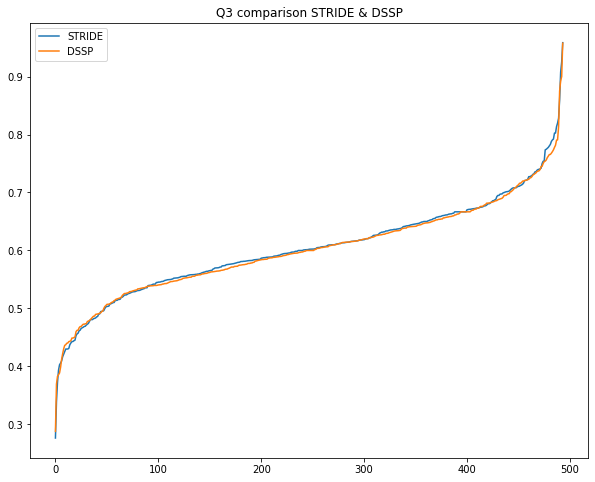

In [2]:
project.plotGraph("Results/stride_output.csv", "Results/dssp_output.csv", 3, "STRIDE", "DSSP", "Q3 comparison STRIDE & DSSP")

#### MCC
The following figures illustrate three aspects: the MCC values for the Helix, Sheet and Coil states. We take a look at the % of correctly predicted states with this measure. 

The first figure illustrates the MCC score for the Helix state of both STRIDE & DSSP datasets. The STRIDE values are higher than those of DSSP indicating that the predicted secondary states within the STRIDE dataset is slightly better predicted. 

The second figure illustrates the MCC score for the Sheet state of both STRIDE & DSSP datasets. Looking at the second figure, we see that there is not much a difference between the score of both datasets. 

The third figure illustrates the same as above but for the MCC score of the Coil state. For this one, we contain more Coil information because we mapped all Other states to Coil states at the beginning of the project. Again, some points are higher for the STRIDE dataset than those of the DSSP, but there is no major difference in MCC values of any of the three states.

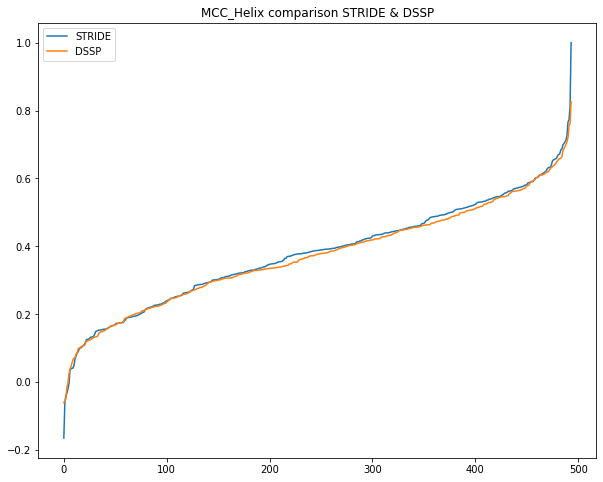

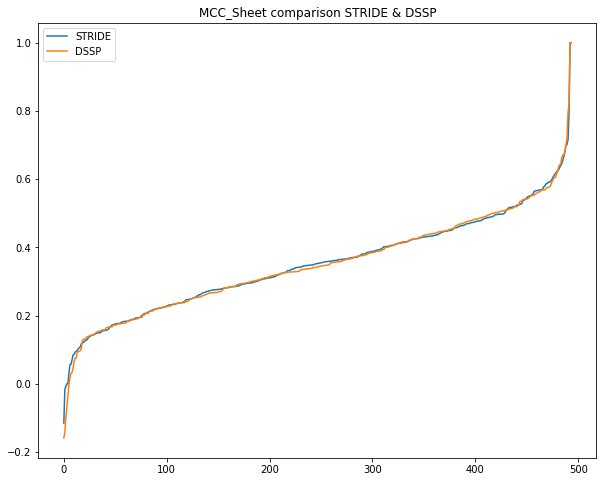

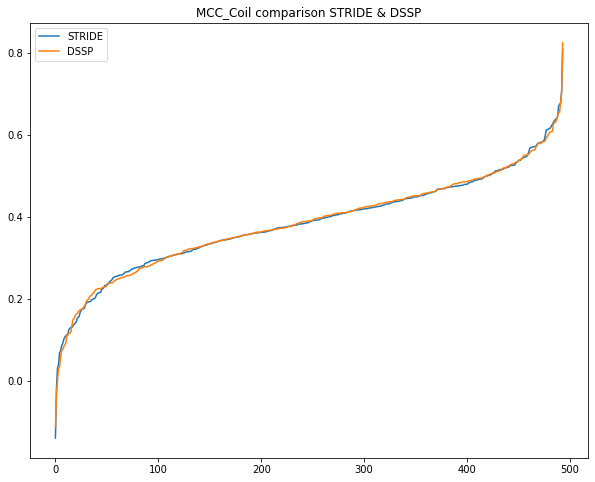

In [3]:
project.plotGraph("Results/stride_output.csv", "Results/dssp_output.csv", 4, "STRIDE", "DSSP", "MCC_Helix comparison STRIDE & DSSP")
project.plotGraph("Results/stride_output.csv", "Results/dssp_output.csv", 5, "STRIDE", "DSSP", "MCC_Sheet comparison STRIDE & DSSP")
project.plotGraph("Results/stride_output.csv", "Results/dssp_output.csv", 6, "STRIDE", "DSSP", "MCC_Coil comparison STRIDE & DSSP")

### Per protein family
Lastly, we will take a look at the Q3 and the MCC values per protein family.
#### Q3
 When running the code below, the Q3 results per protein family will be shown. The Q3 values lie at an secondary state prediction accuracy average of 62,5%. As said before, the initial goal was to reach the theoretical 63% of the GORIII algorithm. With this, we can conclude to have fulfilled that goal.

In [10]:
project.generateAveragePerFamily(3, "Q3 value")

The overall Q3 value of the Alpha protein family is: 66.0 %.
The overall Q3 value of the Alpha/Beta protein family is: 61.0 %.
The overall Q3 value of the Beta protein family is: 60.0 %.
The overall Q3 value of the None protein family is: 63.0 %.


#### MCC
We have taken a look at the Q3 value per protein family, now we will take a look at the MCC values per protein family. We compute the average MCC state value per protein family in this section. The overall accuracy prediction of the the states for each family vary between a minimal of 34% and a maximum of 40%.

In [11]:
project.generateAveragePerFamily(4, "MCC_Helix value")
print("")
project.generateAveragePerFamily(5, "MCC_Sheet value")
print("")
project.generateAveragePerFamily(6, "MCC_Coil value")

The overall MCC_Helix value of the Alpha protein family is: 38.0 %.
The overall MCC_Helix value of the Alpha/Beta protein family is: 38.0 %.
The overall MCC_Helix value of the Beta protein family is: 38.0 %.
The overall MCC_Helix value of the None protein family is: 40.0 %.

The overall MCC_Sheet value of the Alpha protein family is: 37.0 %.
The overall MCC_Sheet value of the Alpha/Beta protein family is: 36.0 %.
The overall MCC_Sheet value of the Beta protein family is: 34.0 %.
The overall MCC_Sheet value of the None protein family is: 34.0 %.

The overall MCC_Coil value of the Alpha protein family is: 40.0 %.
The overall MCC_Coil value of the Alpha/Beta protein family is: 39.0 %.
The overall MCC_Coil value of the Beta protein family is: 38.0 %.
The overall MCC_Coil value of the None protein family is: 37.0 %.
